# HYPOTHESIS TESTING CASE STUDY

## Buisness Problem 1

In [268]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
loans=pd.read_csv("D:\\Learning\\Basic Statistics - Hypothesis Testing (1)\\4. Basic Statistics - Hypothesis Testing\\LoansData.csv")

In [3]:
loans.columns=[x.replace('.','_') for x in loans.columns]

In [4]:
loans['Interest_Rate']=loans['Interest_Rate'].str.replace('%','').astype('float')

In [5]:
loans['Loan_Length'] = loans['Loan_Length'].str.replace(' months','').astype('float')

In [6]:
loans['Debt_To_Income_Ratio'] = loans['Debt_To_Income_Ratio'].str.replace('%','').astype('float')

In [7]:
loans['FICO'] = (loans['FICO_Range'].str.split('-', expand = True)[0].astype('float') + loans['FICO_Range'].str.split('-', expand = True)[1].astype('float') ) / 2

In [8]:
loans['Employment_Length'] = loans['Employment_Length'].str.replace(' years','').str.replace(' year','').str.replace('< ','').str.replace('+','').astype('float')

In [9]:
loans.drop(columns=['FICO_Range'],axis=1,inplace=True)

In [10]:
def missing_imputation(x):
    if x.dtype == 'object':
        x = x.fillna(x.mode()[0])
    else:
        x = x.fillna(x.median())
    return x

In [11]:
loans=loans.apply(missing_imputation)

In [12]:
loans

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,FICO
0,20000.0,20000.00,8.90,36.0,debt_consolidation,14.90,SC,MORTGAGE,6541.67,14.0,14272.0,2.0,1.0,737.0
1,19200.0,19200.00,12.12,36.0,debt_consolidation,28.36,TX,MORTGAGE,4583.33,12.0,11140.0,1.0,2.0,717.0
2,35000.0,35000.00,21.98,60.0,debt_consolidation,23.81,CA,MORTGAGE,11500.00,14.0,21977.0,1.0,2.0,692.0
3,10000.0,9975.00,9.99,36.0,debt_consolidation,14.30,KS,MORTGAGE,3833.33,10.0,9346.0,0.0,5.0,697.0
4,12000.0,12000.00,11.71,36.0,credit_card,18.78,NJ,RENT,3195.00,11.0,14469.0,0.0,9.0,697.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,30000.0,29950.00,16.77,60.0,debt_consolidation,19.23,NY,MORTGAGE,9250.00,15.0,45880.0,1.0,8.0,707.0
2496,16000.0,16000.00,14.09,60.0,home_improvement,21.54,MD,OWN,8903.25,18.0,18898.0,1.0,10.0,742.0
2497,10000.0,10000.00,13.99,36.0,debt_consolidation,4.89,PA,MORTGAGE,2166.67,4.0,4544.0,0.0,10.0,682.0
2498,6000.0,6000.00,12.42,36.0,major_purchase,16.66,NJ,RENT,3500.00,8.0,7753.0,0.0,5.0,677.0


### a

In [23]:
# Ho : There is no significant difference in interest rates among different loan amount groups.
# Ha : There is a significant difference in interest rates among different loan amount groups, and less interest is charged for high loan amounts.
# CI : 95%
# p-value : 0.05

In [93]:
loan_amounts = loans['Amount_Funded_By_Investors']

# Define the custom bin edges to create groups (e.g., quartiles)
bin_edges = [loan_amounts.min(),loan_amounts.quantile(0.5), loan_amounts.max()]

# Define the group labels based on the quantiles
group_labels = ['Low', 'Medium','High']

# Create a new column in the DataFrame to store the loan amount groups
loans['Loan_Amount_Group'] = pd.cut(loan_amounts,bins=3,labels=group_labels)


In [97]:
Low=loans.loc[loans.Loan_Amount_Group=='Low','Interest_Rate']
Medium=loans.loc[loans.Loan_Amount_Group=='Medium','Interest_Rate']
High=loans.loc[loans.Loan_Amount_Group=='High','Interest_Rate']

In [98]:
stats.f_oneway(Low,Medium,High)

F_onewayResult(statistic=131.8082307656362, pvalue=3.81037349749801e-55)

In [101]:
print('''We have to reject null hypothesis, as the p_value <0.05, 
there is a significant difference in interest rates among different loan amount groups, 
and less interest is charged for high loan amounts.''')

We have to reject null hypothesis, as the p_value <0.05, 
there is a significant difference in interest rates among different loan amount groups, 
and less interest is charged for high loan amounts.


### b

In [102]:
# Ho : r=0
# Ha : r<>0
# CI : 95%
# p_value : 0.05

In [103]:
stats.pearsonr(loans.Interest_Rate, loans.Loan_Length)

PearsonRResult(statistic=0.42416737515954434, pvalue=9.60599160781791e-110)

In [104]:
print(''' We have to reject null hypothesis, Interest rates are effected by loan_length''')

 We have to reject null hypothesis, Interest rates are effected by loan_length


### c

In [ ]:
# Ho : There is no difference in interest rates  for different loan_purposes
# Ha:  There is difference in interest rates for different loan _purpose
# CI : 95%
# p_value : 0.05

In [109]:
loans.Loan_Purpose.unique()

array(['debt_consolidation', 'credit_card', 'other', 'moving', 'car',
       'vacation', 'home_improvement', 'house', 'major_purchase',
       'educational', 'medical', 'wedding', 'small_business',
       'renewable_energy'], dtype=object)

In [107]:
s1=loans.loc[loans.Loan_Purpose=='debt_consolidation','Interest_Rate']
s2=loans.loc[loans.Loan_Purpose=='credit_card','Interest_Rate']
s3=loans.loc[loans.Loan_Purpose=='other','Interest_Rate']
s4=loans.loc[loans.Loan_Purpose=='moving','Interest_Rate']
s5=loans.loc[loans.Loan_Purpose=='car','Interest_Rate']
s6=loans.loc[loans.Loan_Purpose=='vacation','Interest_Rate']
s7=loans.loc[loans.Loan_Purpose=='home_improvement','Interest_Rate']
s8=loans.loc[loans.Loan_Purpose=='house','Interest_Rate']
s9=loans.loc[loans.Loan_Purpose=='major_purchase','Interest_Rate']
s10=loans.loc[loans.Loan_Purpose=='major_purchase','Interest_Rate']
s11=loans.loc[loans.Loan_Purpose=='educational','Interest_Rate']
s12=loans.loc[loans.Loan_Purpose=='medical','Interest_Rate']
s13=loans.loc[loans.Loan_Purpose=='wedding','Interest_Rate']
s14=loans.loc[loans.Loan_Purpose=='small_business','Interest_Rate']
s15=loans.loc[loans.Loan_Purpose=='renewable_energy','Interest_Rate']


In [108]:
stats.f_oneway(s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15)

F_onewayResult(statistic=9.191030232847098, pvalue=4.439304680071264e-20)

In [110]:
print('''We reject null hypothesis, different loan purposes have different interest rates''')

We reject null hypothesis, different loan purposes have different interest rates


### d

In [122]:
# Ho : r=0
# Ha : r<>0
# p_value : 0.05

In [112]:
loans. Home_Ownership.unique()  

array(['MORTGAGE', 'RENT', 'OWN', 'OTHER', 'NONE'], dtype=object)

In [120]:
h1=loans.loc[loans.Home_Ownership=='MORTGAGE','FICO']
h2=loans.loc[loans.Home_Ownership=='RENT','FICO']
h3=loans.loc[loans.Home_Ownership=='OWN','FICO']
h4=loans.loc[loans.Home_Ownership=='OTHER','FICO']
h5=loans.loc[loans.Home_Ownership=='NONE','FICO']


In [121]:
stats.f_oneway(h1,h2,h3,h4,h5)

F_onewayResult(statistic=19.345822938089942, pvalue=1.0902432079019346e-15)

In [123]:
print(' We reject null hypothesis, FICO is independent of Home_ownership')

 We reject null hypothesis, FICO is independent of Home_ownership


## Buisnees Problem 2

In [124]:
Price_quotes=pd.read_csv("D:\\Learning\\Basic Statistics - Hypothesis Testing (1)\\4. Basic Statistics - Hypothesis Testing\Price_Quotes.csv")

In [125]:
Price_quotes

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129
5,6,136,119
6,7,94,97
7,8,103,104
8,9,140,127
9,10,152,133


In [ ]:
# Ho : u1=u2
# Ha : u1<>u2
# CI : 95%
# p_value: 0.05

In [129]:
stats.ttest_rel(Price_quotes.Barry_Price, Price_quotes.Mary_Price)

TtestResult(statistic=2.5213765108923494, pvalue=0.02840588045242053, df=11)

In [134]:
print(' We reject null hypothesis, there is a significant difference in the average price quotes provided by Mary and Barry.')

 We reject null hypothesis, there is a significant difference in the average price quotes provided by Mary and Barry.


## Buisness Problem 3

In [132]:
Treatment= pd.read_csv("D:\\Learning\\Basic Statistics - Hypothesis Testing (1)\\4. Basic Statistics - Hypothesis Testing\\Treatment_Facility.csv")

In [162]:
Treatment=Treatment.rename(columns={'VAR4':'TRFF','VAR5':'CI'})

In [163]:
prior= Treatment[Treatment.Reengineer=='Prior']
post= Treatment[Treatment.Reengineer=='Post']

In [146]:
# Ho: Reengineering effort had no impact on employee turnover
# Ha: Reengineering effort had impact on employee turnover
# p_value: 0.05
# CI : 95%

In [165]:
stats.ttest_ind(prior.Employee_Turnover,post.Employee_Turnover)

TtestResult(statistic=-1.770306704753604, pvalue=0.09361109345535304, df=18.0)

In [169]:
print('We fail to reject null hypothesis. With 95 percent confidence interval,we cannot say that there is effect in staff turnover with this data.')

We fail to reject null hypothesis. With 95 percent confidence interval,we cannot say that there is effect in staff turnover with this data.


In [168]:
# Ho: CI has not improved
# Ha: CI has improved
# CI : 95%
# p_value: 0.05

In [167]:
stats.f_oneway(prior.CI,post.CI)

F_onewayResult(statistic=2.650105376271948, pvalue=0.12091989189884145)

In [170]:
print('We fail to reject null hypothesis. With 95 percent confidence interval,we cannot say that the reengineering effort changed the critical incidence rate wuth this data.')

We fail to reject null hypothesis. With 95 percent confidence interval,we cannot say that the reengineering effort changed the critical incidence rate wuth this data.


## Buisness Problem 4

In [171]:
priority_data=pd.read_csv("D:\\Learning\\Basic Statistics - Hypothesis Testing (1)\\4. Basic Statistics - Hypothesis Testing\\Priority_Assessment.csv")

In [181]:
# Ho: Prioritization system is not occurring
# Ha: Prioritization system is occuring
# CI: 95%
# p_value: 0.05

In [179]:
high=priority_data.loc[priority_data.Priority=='High','Days']
medium=priority_data.loc[priority_data.Priority=='Medium','Days']
low=priority_data.loc[priority_data.Priority=='Low','Days']

In [180]:
stats.f_oneway(high,medium,low)

F_onewayResult(statistic=1.812311010076072, pvalue=0.16411459461716182)

In [184]:
print('We cannot reject null hypothesis. With 95 percent confidence interval,we cannot say that that high priority jobs are completed more quickly than medium priority jobs, and medium priority jobs are completed more quickly than low priority jobs with the    help of this data')

We cannot reject null hypothesis. With 95 percent confidence interval,we cannot say that that high priority jobs are completed more quickly than medium priority jobs, and medium priority jobs are completed more quickly than low priority jobs with the    help of this data


## Buisness Problem 5

In [189]:
films=pd.read_csv("D:\\Learning\\Basic Statistics - Hypothesis Testing (1)\\4. Basic Statistics - Hypothesis Testing\\Films.csv")

In [192]:
films.Gender=np.where((films.Gender == 'Male') | (films.Gender == '1'),"Male","Female")

In [193]:
films.Marital_Status=np.where((films.Marital_Status=='1') | (films.Marital_Status=='Married') ,"Married","Single") 

In [197]:
for i in films.columns:
    films[i]=films[i].fillna(films[i].mode()[0])

### a

In [199]:
films.columns

Index(['_rowstate_', 'Movie', 'Gender', 'Marital_Status', 'Sinage', 'Parking',
       'Clean', 'Overall', 'Age', 'Income', 'Hear_About'],
      dtype='object')

In [202]:
avg=films.Overall.mean()

In [203]:
STD=films.Overall.std()

In [204]:
SE=STD/np.sqrt(300)

In [205]:
SE

0.03971166534219382

In [212]:
print(f'With 95% confidence , we can say overall customer satisfaction will range from ({avg-(1.96*SE)} - {avg +(1.96*SE)})')

With 95% confidence , we can say overall customer satisfaction will range from (1.5433772571414213 - 1.699046985282821)


### b

#### Movie

In [216]:
films.Movie.unique()

array(['Ferris Buellers Day Off', 'Willy Wonka', 'Old School'],
      dtype=object)

In [217]:
movie_1=films.loc[films.Movie=="Ferris Buellers Day Off",'Overall']
movie_2=films.loc[films.Movie=="Willy Wonka",'Overall']
movie_3=films.loc[films.Movie=="Old School",'Overall']

In [218]:
stats.f_oneway(movie_1,movie_2,movie_3)

F_onewayResult(statistic=1.3352437528862333, pvalue=0.2645245972839795)

In [232]:
print('\033[1m Movie doesnt impact customer satisfaction \033[0m')

 Movie doesnt impact customer satisfaction 


#### Gender

In [222]:
Male= films.loc[films.Gender=='Male','Overall']
Female= films.loc[films.Gender=='Female','Overall']

In [223]:
stats.ttest_ind(Male,Female)

TtestResult(statistic=1.393621669674226, pvalue=0.164375419321128, df=328.0)

In [233]:
print('\033[1m Gender doesnt impact customer satisfaction \033[0m')

 Gender doesnt impact customer satisfaction 


#### Marital_status

In [226]:
single= films.loc[films.Marital_Status=='Single','Overall']
married=films.loc[films.Marital_Status=='Married','Overall']

In [227]:
stats.ttest_ind(single,married)

TtestResult(statistic=0.7171640309514444, pvalue=0.47378328196635067, df=328.0)

In [234]:
print('\033[1m Marital_Status doesnt impact customer satisfaction \033[0m')

 Marital_Status doesnt impact customer satisfaction 


#### Signage

In [236]:
films.Sinage.info()

<class 'pandas.core.series.Series'>
RangeIndex: 330 entries, 0 to 329
Series name: Sinage
Non-Null Count  Dtype  
--------------  -----  
330 non-null    float64
dtypes: float64(1)
memory usage: 2.7 KB


In [231]:
stats.pearsonr(films.Sinage,films.Overall)

PearsonRResult(statistic=0.38210280422395654, pvalue=6.501065434767194e-13)

In [235]:
print('\033[1m With 95% Confidence, we can say that Signage impacts customer satisfaction \033[0m')

 With 95% Confidence, we can say that Signage impacts customer satisfaction 


#### Parking

In [237]:
stats.pearsonr(films.Parking, films.Overall)

PearsonRResult(statistic=0.5144289487855264, pvalue=1.0840276087792884e-23)

In [238]:
print('\033[1m With 95% Confidence, we can say that Parking also impacts customer satisfaction \033[0m')

 With 95% Confidence, we can say that Parking also impacts customer satisfaction 


#### Clean

In [239]:
stats.pearsonr(films.Clean, films.Overall)

PearsonRResult(statistic=0.35082227890709183, pvalue=5.437550007440304e-11)

In [240]:
print('\033[1m With 95% Confidence, we can say that Cleanliness also impacts customer satisfaction \033[0m')

 With 95% Confidence, we can say that Cleanliness also impacts customer satisfaction 


#### Age

In [241]:
films.Age.unique()

array([3., 2., 4., 1.])

In [242]:
a1=films.loc[films.Age==1,'Overall']
a2=films.loc[films.Age==2,'Overall']
a3=films.loc[films.Age==3,'Overall']
a4=films.loc[films.Age==4,'Overall']

In [243]:
stats.f_oneway(a1,a2,a3,a4)

F_onewayResult(statistic=1.0249927945692117, pvalue=0.3816737451872476)

In [244]:
print('\033[1m Age doesnt impact customer satisfaction \033[0m')

 Age doesnt impact customer satisfaction 


#### Income

In [245]:
I1=films.loc[films.Income==1,'Overall']
I2=films.loc[films.Income==2,'Overall']
I3=films.loc[films.Income==3,'Overall']

In [246]:
stats.f_oneway(I1,I2,I3)

F_onewayResult(statistic=0.16488481054397225, pvalue=0.8480618362664576)

In [247]:
print('\033[1m Income doesnt impact customer satisfaction \033[0m')

 Income doesnt impact customer satisfaction 


#### Hear about

In [249]:
films.Hear_About.unique()

array(['5', '1', '4', '2', '3', '4,5', '2,5', '1,5', '3,4', '5,4', '3,5'],
      dtype=object)

In [256]:
h5=films.loc[films.Hear_About=='5','Overall']
h4=films.loc[films.Hear_About=='4','Overall']
h3=films.loc[films.Hear_About=='3','Overall']
h2=films.loc[films.Hear_About=='2','Overall']
h1=films.loc[films.Hear_About=='1','Overall']
h4_5=films.loc[films.Hear_About=='4,5','Overall']
h2_5=films.loc[films.Hear_About=='2,5','Overall']
h1_5=films.loc[films.Hear_About=='1,5','Overall']
h3_4=films.loc[films.Hear_About=='3,4','Overall']
h5_4=films.loc[films.Hear_About=='5,4','Overall']
h3_5=films.loc[films.Hear_About=='3,5','Overall']




In [257]:
stats.f_oneway(h5,h4,h3,h2,h1,h4_5,h2_5,h1_5,h3_4,h5_4,h3_5)

F_onewayResult(statistic=1.457397539085138, pvalue=0.15433478299883044)

In [258]:
print('\033[1m Hear_about doesnt impact customer satisfaction \033[0m')

 Hear_about doesnt impact customer satisfaction 


In [259]:
print('\33[1m Parking, Signage and Cleanliness are the fators impacting cutomer satisfaction')

 Parking, Signage and Cleanliness are the fators impacting cutomer satisfaction


### c

In [261]:
films.columns

Index(['_rowstate_', 'Movie', 'Gender', 'Marital_Status', 'Sinage', 'Parking',
       'Clean', 'Overall', 'Age', 'Income', 'Hear_About'],
      dtype='object')

In [280]:
a=(films.Gender.value_counts()/330*100).reset_index()

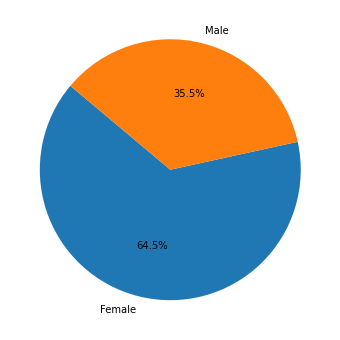

In [294]:
plt.figure(figsize=(6, 6))
plt.pie(a['count'], labels=a['Gender'], autopct='%1.1f%%', startangle=140)
plt.show()


In [295]:
b=(films.Marital_Status.value_counts()/330*100).reset_index()

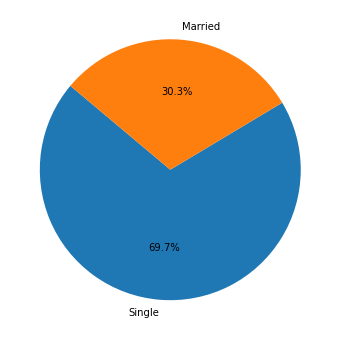

In [298]:
plt.figure(figsize=(6, 6))
plt.pie(b['count'], labels=b['Marital_Status'], autopct='%1.1f%%', startangle=140)
plt.show()

In [299]:
c=(films.Age.value_counts()/330*100).reset_index()

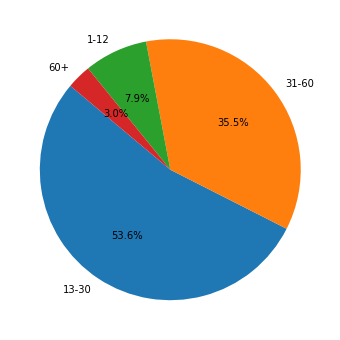

In [304]:
plt.figure(figsize=(6, 6))
plt.pie(c['count'], labels=['13-30','31-60','1-12','60+'], autopct='%1.1f%%', startangle=140)
plt.show()

In [305]:
d=(films.Income.value_counts()/330*100).reset_index()

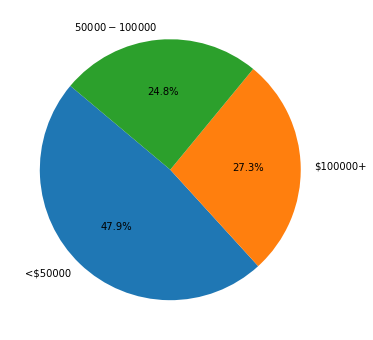

In [308]:
plt.figure(figsize=(6, 6))
plt.pie(d['count'], labels=['<$50000','$100000+','$50000-$100000'], autopct='%1.1f%%', startangle=140)
plt.show()

### d

In [321]:
films.Hear_About.value_counts().reset_index().iloc[0,0]

'5'

In [323]:
print('\033[1m Word of mouth\033[0m')

 Word of mouth
